In [1]:
import numpy as np
import glob
import re
import matplotlib.pyplot as plt
from scipy.io import loadmat
import os.path

In [2]:
def lineseg_dists(p, a, b):
    """Cartesian distance from point to line segment

    Edited to support arguments as series, from:
    https://stackoverflow.com/a/54442561/11208892

    Args:
        - p: np.array of single point, shape (2,) or 2D array, shape (x, 2)
        - a: np.array of shape (x, 2)
        - b: np.array of shape (x, 2)
    """
    # normalized tangent vectors
    d_ba = b - a
    d = np.divide(d_ba, (np.hypot(d_ba[:, 0], d_ba[:, 1])
                           .reshape(-1, 1)))

    # signed parallel distance components
    # rowwise dot products of 2D vectors
    s = np.multiply(a - p, d).sum(axis=1)
    t = np.multiply(p - b, d).sum(axis=1)

    # clamped parallel distance
    h = np.maximum.reduce([s, t, np.zeros(len(s))])

    # perpendicular distance component
    # rowwise cross products of 2D vectors  
    d_pa = p - a
    c = d_pa[:, 0] * d[:, 1] - d_pa[:, 1] * d[:, 0]

    return np.hypot(h, c)

def lineseg_dist(p, a, b): 
    n_p = p.shape[0] 
    n_s = a.shape[0]

    p_s = np.tile(p, (n_s,1))
    a_s = np.tile(a, (1,n_p)).reshape((-1,2))
    b_s = np.tile(b, (1,n_p)).reshape((-1,2))
    
    dists = lineseg_dists(p_s, a_s, b_s)
    dists = dists.reshape((-1, n_p)).reshape((-1, n_p))
    dists = np.min(dists, axis=0)
    
    return dists


# Generate structured mesh for $x_2$, $x_3$, $h$

Let define $h_c = 20$ and $x_1 = 40$

1. Initial mesh is from $(\frac{x_1 + x_3}{2}, x_3, h)$


2. Deform the mesh from $(\frac{x_1 + x_3}{2}, x_3, h)$ to $(x_2, x_3, h)$
    $$(x, y) \rightarrow (x + \Delta x, y)$$
    
* For the points $x \in [0, \frac{x_1 + x_3}{2}] \qquad y \in [0, h]$ 
    
    $$ \Delta x_{max} = x_2 - \frac{x_1 + x_3}{2} \qquad \Delta x = \frac{x - 0}{\frac{x_1  + x_3}{2}\frac{y}{h} + (1 - \frac{y}{h})x_1}  \frac{y}{h} \Delta x_{max} $$
       
* For the points $x \in [0, \frac{x_1 + x_3}{2}] \qquad y \in [h, L_y - h]$ 
       
    $$ \Delta x_{max} = x_2 - \frac{x_1 + x_3}{2} \qquad \Delta x = \frac{x - 0}{\frac{x_1  + x_3}{2}}   \Delta x_{max} $$


* For the points $x \in [0, \frac{x_1 + x_3}{2}] \qquad y \in [L_y - h, L_y]$ 
       
    $$ \Delta x_{max} = x_2 - \frac{x_1 + x_3}{2} \qquad \Delta x = \frac{x - 0}{\frac{x_1  + x_3}{2}\frac{L_y - y}{h} + (1 - \frac{L_y - y}{h})x_1}  \frac{L_y - y}{h} \Delta x_{max} $$
       
* For the points $x \in [\frac{x_1 + x_3}{2}, L_x] \qquad y \in [0, h]$ 
    
    $$ \Delta x_{max} = x_2 - \frac{x_1 + x_3}{2} \qquad \Delta x = \frac{L_x - x}{(L_x - \frac{x_1  + x_3}{2})\frac{y}{h} + (1 - \frac{y}{h})(L_x - x_3)}  \frac{y}{h} \Delta x_{max} $$
       
* For the points $x \in [\frac{x_1 + x_3}{2}, L_x] \qquad y \in [h, L_y - h]$ 
       
    $$ \Delta x_{max} = x_2 - \frac{x_1 + x_3}{2} \qquad \Delta x = \frac{L_x - x}{(L_x - \frac{x_1  + x_3}{2})}  \Delta x_{max} $$


* For the points $x \in [\frac{x_1 + x_3}{2}, L_x] \qquad y \in [L_y - h, L_y]$ 
       
    $$ \Delta x_{max} = x_2 - \frac{x_1 + x_3}{2} \qquad \Delta x = \frac{L_x - x}{(L_x - \frac{x_1  + x_3}{2})\frac{L_y - y}{h} + (1 - \frac{L_y - y}{h})(L_x - x_3)}  \frac{L_y - y}{h} \Delta x_{max} $$
    
    
Overall, the formula can be written as 

$$ \Delta x_{max} = x_2 - \frac{x_1 + x_3}{2} \qquad \Delta x = \frac{dx}{(dx_1)dy + (h - dy)(dx_2)}  dy \Delta x_{max} $$
        
```
for x2 in range(41,60,2):
    for x3 in range(41,60,2):
        for h in np.arange(2,6.6,0.5):
```

/Users/huang/Desktop/Code/Geo-FNO-catheter/catheter.py:230: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(X, Y, np.zeros(X.shape), facecolor="none", edgecolors="r")
/Users/huang/Desktop/Code/Geo-FNO-catheter/catheter.py:258: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(X, Y, np.zeros(X.shape), facecolor="none", edgecolors="r")


(array([[  0.        ,   2.        ,   4.        , ...,  95.        ,
          97.5       , 100.        ],
        [  0.        ,   1.65853659,   3.31707317, ...,  94.31372549,
          97.15686275, 100.        ],
        [  0.        ,   1.33333333,   2.66666667, ...,  93.65384615,
          96.82692308, 100.        ],
        ...,
        [  0.        ,   1.33333333,   2.66666667, ...,  93.65384615,
          96.82692308, 100.        ],
        [  0.        ,   1.65853659,   3.31707317, ...,  94.31372549,
          97.15686275, 100.        ],
        [  0.        ,   2.        ,   4.        , ...,  95.        ,
          97.5       , 100.        ]]),
 array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 2.,  2.,  2., ...,  2.,  2.,  2.],
        ...,
        [18., 18., 18., ..., 18., 18., 18.],
        [19., 19., 19., ..., 19., 19., 19.],
        [20., 20., 20., ..., 20., 20., 20.]]))

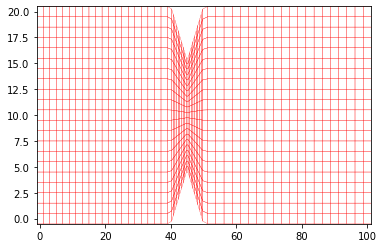

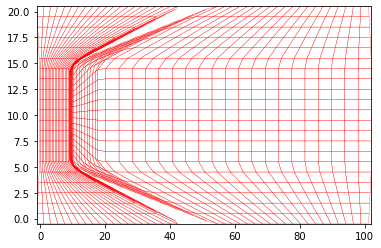

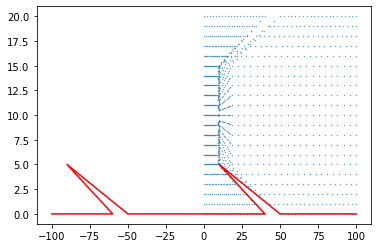

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from catheter import numpy_catheter_mesh_2d


x1, x2, x3, h = 40, 10, 50, 5
ncy = 20
ncx1, ncx2, ncx3, ncx4 = 20, 10, 10, 20

numpy_catheter_mesh_2d(x2, x3, h, ncy, ncx1, ncx2, ncx3, ncx4, plot_or_not = True)

In [12]:
ncy = 100
ncx1, ncx2, ncx3, ncx4 = 50, 50, 50, 50
ncx = ncx1 + ncx2 + ncx3 + ncx4


ndata = len(range(41,60,2))*len(range(41,60,2))*len(np.arange(2,6.6,0.5))
x_mesh, y_mesh = np.zeros((ncy+1, 2*ncx+1, ndata)), np.zeros((ncy+1, 2*ncx+1, ndata))
wdist_structured_mesh = np.zeros((ncy+1, 2*ncx+1, ndata))


pref_folder = "/groups/esm/dzhuang/Catheter/"
ind = 0
for x2 in range(41,60,2):
    for x3 in range(41,60,2):
        for h in np.arange(2,6.6,0.5):
            
            
            X, Y = numpy_catheter_mesh_2d(x2, x3, h, ncy, ncx1, ncx2, ncx3, ncx4, plot_or_not = False)
            x_mesh[:, 0:ncx+1, ind], y_mesh[:, 0:ncx+1, ind] = X-100, Y
            x_mesh[:, ncx:, ind], y_mesh[:, ncx:, ind]   = X, Y
            
            
            path = np.vstack(([0, 40.0, x2, x3, 100.0], [0, 0.0, h, 0, 0.0])).transpose()
            path_a, path_b = path[0:-1,:], path[1:,:]
            path = np.vstack(([0.0, 40.0, x2, x3, 100.0], [20.0, 20.0, 20.0-h, 20.0, 20.0])).transpose()
            path_a, path_b = np.vstack((path_a,path[0:-1,:])), np.vstack((path_b,path[1:,:]))
            wdist_1d = lineseg_dist(np.vstack((X.flatten(), Y.flatten())).transpose(), path_a, path_b)
            wdist_structured_mesh[:, 0:ncx+1, ind] = np.reshape(wdist_1d, X.shape)
            wdist_structured_mesh[:, ncx:, ind] = np.reshape(wdist_1d, X.shape)
            
            
            ind += 1
            
np.save(pref_folder+"x_2d_structured_mesh.npy",   x_mesh)
np.save(pref_folder+"y_2d_structured_mesh.npy",   y_mesh)
np.save(pref_folder+"wdist_structured_mesh.npy", wdist_structured_mesh)


In [15]:
pref_folder = "/groups/esm/dzhuang/Catheter/"

density_1d_data       = np.load(pref_folder+"density_1d_data.npy")
density_1d_raw_data   = np.load(pref_folder+"density_1d_raw_data.npy")

x_2d_structured_mesh  = np.load(pref_folder+"x_2d_structured_mesh.npy")
y_2d_structured_mesh  = np.load(pref_folder+"y_2d_structured_mesh.npy")
wdist_structured_mesh = np.load(pref_folder+"wdist_structured_mesh.npy")
info_1d_data = np.load(pref_folder+"info_1d_data.npy")

41.0 45.0 2.5


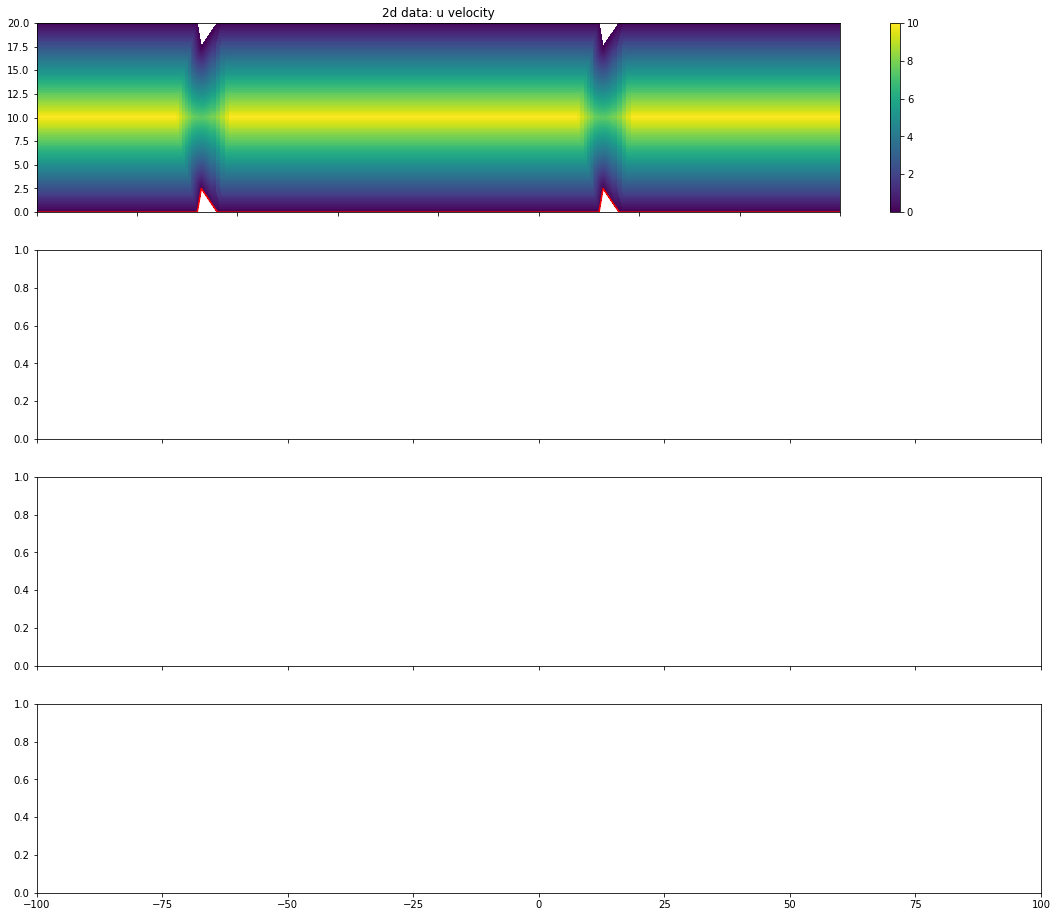

In [16]:
sample_id = 21
fig, ax = plt.subplots(nrows=4,sharex=True, sharey=False, figsize=(18,16))

x2, x3, h, theta1, theta2, p, n_active_1d = info_1d_data[:, sample_id]

print(x2, x3, h)

n_active_1d = np.int64(n_active_1d)
x_2d = x_2d_structured_mesh[:,:,sample_id]
y_2d = y_2d_structured_mesh[:,:,sample_id]
wdist_2d = wdist_structured_mesh[:,:,sample_id]    
density = density_1d_data[:, sample_id]
density_raw = density_1d_raw_data[:, sample_id]

bottom_x, bottom_y = np.array([0-100, 40.0-100, x2-100, x3-100, 0, 40.0, x2, x3, 100.0]),  np.array([0, 0.0, h, 0, 0.0, 0, h, 0, 0.0])

# visualize 2d flow u velocity
im0 = ax[0].pcolormesh(x_2d, y_2d, wdist_2d)
ax[0].plot(bottom_x, bottom_y, color="r")
ax[0].set_title("2d data: u velocity")
fig.colorbar(im0,ax=ax[0])


# # visualize 2d flow wall distance
# im1 = ax[1].pcolormesh(x_2d, y_2d, wdist_2d)
# ax[1].plot(bottom_x, bottom_y, color="r")
# ax[1].set_title("2d data: wall distance")
# fig.colorbar(im1,ax=ax[1])

# # visualize 1d flow u velocity
# x_1d = x_1d_data[:,sample_id][0:n_active_1d]
# y_1d = y_1d_data[:,sample_id][0:n_active_1d]
# u_1d = u_1d_data[:,sample_id][0:n_active_1d]
# wdist_1d = wdist_1d_data[:,sample_id][0:n_active_1d]
# im2 = ax[2].scatter(x_1d, y_1d, s=1, c=wdist_1d)
# ax[2].plot(bottom_x, bottom_y, color="r")
# ax[2].set_title("1d data: wall distance")
# fig.colorbar(im2,ax=ax[2])


# # visualize bacteria density
# im3 = ax[3].pcolormesh(x_2d, y_2d, u_2d, alpha=0.1)
# ax[3].plot(bottom_x, bottom_y, color="r")   
# xx = np.linspace(-100, 100, 2001)
# ax[3].plot(xx, density_raw)
# ax[3].plot(xx, density)

# ax[3].set_title("1d data: bacteria density")
# fig.colorbar(im3,ax=ax[3])

# fig.savefig("Data_vis.png")

# Generate 1D surface mesh for $x_2$, $x_3$, $h$


Let define $h_c = 20$ and $x_1 = 40$

1. Initial mesh is from $(\frac{x_1 + x_3}{2}, x_3, h)$


2. Deform the mesh from $(\frac{x_1 + x_3}{2}, x_3, h)$ to $(x_2, x_3, h)$
    $$(x, y) \rightarrow (x + \Delta x, y)$$
    
* For the points $x \in [x_1, \frac{x_1 + x_3}{2}] \qquad y \in [0, h]$ 
    
    $$ \Delta x_{max} = x_2 - \frac{x_1 + x_3}{2} \qquad \Delta x = \frac{x - 0}{\frac{x_1  + x_3}{2}\frac{y}{h} + (1 - \frac{y}{h})x_1}  \frac{y}{h} \Delta x_{max} $$
       

* For the points $x \in [\frac{x_1 + x_3}{2}, x_3] \qquad y \in [0, h]$ 
    
    $$ \Delta x_{max} = x_2 - \frac{x_1 + x_3}{2} \qquad \Delta x = \frac{L_x - x}{(L_x - \frac{x_1  + x_3}{2})\frac{y}{h} + (1 - \frac{y}{h})(L_x - x_3)}  \frac{y}{h} \Delta x_{max} $$
       
    
Overall, the formula can be written as 

$$ \Delta x_{max} = x_2 - \frac{x_1 + x_3}{2} \qquad \Delta x = \frac{dx}{(dx_1)dy + (h - dy)(dx_2)}  dy \Delta x_{max} $$
        
```
for x2 in range(41,60,2):
    for x3 in range(41,60,2):
        for h in np.arange(2,6.6,0.5):
```

[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.  40.5 41.  41.5 42.  42.5 43.  43.5
 44.  44.5 55.  54.5 54.  53.5 53.  52.5 52.  51.5 51.  50.5 50.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0. ]


(array([  0. ,   2. ,   4. ,   6. ,   8. ,  10. ,  12. ,  14. ,  16. ,
         18. ,  20. ,  22. ,  24. ,  26. ,  28. ,  30. ,  32. ,  34. ,
         36. ,  38. ,  40. ,  37. ,  34. ,  31. ,  28. ,  25. ,  22. ,
         19. ,  16. ,  13. ,  10. ,  14. ,  18. ,  22. ,  26. ,  30. ,
         34. ,  38. ,  42. ,  46. ,  50. ,  52.5,  55. ,  57.5,  60. ,
         62.5,  65. ,  67.5,  70. ,  72.5,  75. ,  77.5,  80. ,  82.5,
         85. ,  87.5,  90. ,  92.5,  95. ,  97.5, 100. ]),
 array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 1. , 1.5, 2. , 2.5,
        3. , 3.5, 4. , 4.5, 5. , 4.5, 4. , 3.5, 3. , 2.5, 2. , 1.5, 1. ,
        0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]))

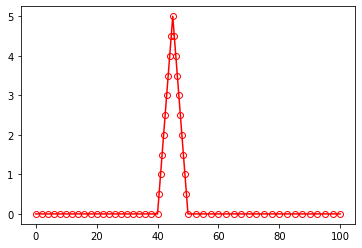

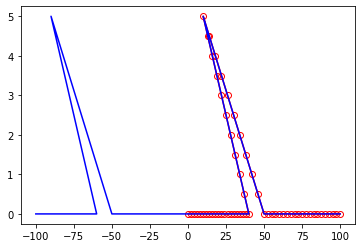

In [33]:
from catheter import numpy_catheter_mesh_1d

x1, x2, x3, h = 40, 10, 50, 5
ncy = 20
ncx1, ncx2, ncx3, ncx4 = 20, 10, 10, 20

numpy_catheter_mesh_1d(x2, x3, h, ncx1, ncx2, ncx3, ncx4, plot_or_not = True)

In [ ]:
ncx1, ncx2, ncx3, ncx4 = 50, 50, 50, 50
ncx = ncx1 + ncx2 + ncx3 + ncx4


ndata = len(range(41,60,2))*len(range(41,60,2))*len(np.arange(2,6.6,0.5))
x_mesh, y_mesh = np.zeros((2*ncx+1, ndata)), np.zeros((2*ncx+1, ndata))

pref_folder = "/groups/esm/dzhuang/Catheter/"
ind = 0
for x2 in range(41,60,2):
    for x3 in range(41,60,2):
        for h in np.arange(2,6.6,0.5):
            
            
            X, Y = numpy_catheter_mesh_1d(x2, x3, h, ncx1, ncx2, ncx3, ncx4, plot_or_not = False)
            x_mesh[0:ncx+1, ind], y_mesh[0:ncx+1, ind] = X-100, Y
            x_mesh[ncx:, ind], y_mesh[ncx:, ind]   = X, Y
            
            
            ind += 1
            
np.save(pref_folder+"x_1d_structured_mesh.npy",   x_mesh)
np.save(pref_folder+"y_1d_structured_mesh.npy",   y_mesh)
